<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>BERTAS</center></span>

<center>Asap data preparation</center>

##   <span style="color:blue">Autores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

## <span style="color:blue">Referencias</span> 

1. [Asap++](https://www.cse.iitb.ac.in/~sam/papers/SAM-LREC-2018-ASAP++.pdf)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* 

## <span style="color:blue">Introduction</span>

Here we prepare final files as follows.
1. Prepare  `Prompt-7.csv` and `Prompt-7.csv` to be the complete Asap++ data.
1. Modify the original ASPA file, to have only one score for the holistic score.
1. Upload the `PromptXX.csv` to the file Modified ASAP file, to be sureof  the data confidence.

## <span style="color:blue">Load required modules</span>

In [2]:
import pandas as pd
import numpy as np

## <span style="color:blue">Names of files to process</span>

In [1]:
# path of hdf5 files containig 2048 embeddings
"""
path_data_hdf5 = '../Datos/Preprocesed_text/'
file_names_hdf5 = ['../Datos/Preprocesed_text/F1_1783_emb_2048.hdf5',
                   '../Datos/Preprocesed_text/F2_1800_emb_2048.hdf5',
                   '../Datos/Preprocesed_text/F8_723_emb_2048.hdf5']

path_target_csv = '../Datos/Asap_data/'
file_names_target_csv = ['../Datos/Asap_data/Prompt-1.csv',
                         '../Datos/Asap_data/Prompt-2.csv',
                         '../Datos/Asap_data/Prompt-8.csv']
"""

path_asap_data = '../Datos/Asap_data/'

## <span style="color:blue">Process prompt 7</span>

First we make the `Prompt-7.csv` file from the original data.
We change some column names in files `Prompt-1.csv` and `Prompt-2.csv` to have the same names in all files.

To compute the scores in `Prompt-7` we compute the mean of the available rater scores and round them.

In the original data there are the fields Word choice neither Fluency. There is a file style the is a combination of the other two. So we obtain the same data for word choice and fluency.


In [4]:
Original_data = pd.read_excel('../Datos/Asap_data/training_set_rel3.xls')

## <span style="color:blue">Process prompt 8</span>

We make the `Prompt-8.csv` file from the original data.
We change some column names in files `Prompt-1.csv` and `Prompt-2.csv` to have the same names in all files.

To compute the scores in `Prompt-8` we compute the mean of the available rater scores and round them.

In prompt-8 we did not use trait3 that is other thing.

## <span style="color:blue">Upload prompt scores to files data</span>

### Create a file with global score for all data

We create a separate file for each prompt for ease.

There are two types of essays:

1. Narrative/Persuasive: F1, F2, F7, F8
2. Source depend:  F3, F4, F5, F6

In [6]:
Original_data = pd.read_excel('../Datos/Asap_data/training_set_rel3.xls')

path_clean_data = '../Datos/Clean_data'

# data required
columns = ['essay_id', 'essay_set', 'essay', 'domain1_score']
req_data = Original_data[columns]
column_names = ['essay_id', 'essay_set', 'essay', 'global_score']
req_data.columns = column_names

# save this data
req_data.to_csv('../Datos/Clean_data_csv/Asap_global_score.csv', index=False)

In [7]:
req_data

,essay_id,essay_set,essay,global_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8
...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35
12974,21628,8,I never understood the meaning laughter is th...,32
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40
12976,21630,8,Trippin' on fen...,40


### Create F1 data

In [13]:
req_data = pd.read_csv('../Datos/Clean_data_csv/Asap_global_score.csv')
prompt1 = pd.read_csv('../Datos/Asap_data/Prompt-1.csv')
column_names = ['essay_id', 'Content', 'Organization', 'Word_Choice', 'Fluency', 'Conventions']
prompt1.columns = column_names

f1 = req_data[req_data['essay_set']==1]

f11 = f1.merge(prompt1, on=['essay_id'])
f11.to_csv('../Datos/Clean_data_csv/F1.csv', index=False)

### Create F2 data

In [14]:
req_data = pd.read_csv('../Datos/Clean_data_csv/Asap_global_score.csv')
prompt2 = pd.read_csv('../Datos/Asap_data/Prompt-2.csv')
column_names = ['essay_id', 'Content', 'Organization', 'Word_Choice', 'Fluency', 'Conventions']
prompt2.columns = column_names

f2 = req_data[req_data['essay_set']==2]

f22 = f2.merge(prompt2, on=['essay_id'])
f22.to_csv('../Datos/Clean_data_csv/F2.csv', index=False)

### Create F7 data

In [15]:
req_data = pd.read_csv('../Datos/Clean_data_csv/Asap_global_score.csv')
prompt7 = pd.read_csv('../Datos/Asap_data/Prompt-7.csv')
column_names = ['essay_id', 'Content', 'Organization', 'Word_Choice', 'Fluency', 'Conventions']
prompt7.columns = column_names

f7 = req_data[req_data['essay_set']==7]

f77 = f7.merge(prompt7, on=['essay_id'])
f77.to_csv('../Datos/Clean_data_csv/F7.csv', index=False)

### Create F8 data

In [16]:
req_data = pd.read_csv('../Datos/Clean_data_csv/Asap_global_score.csv')
prompt8 = pd.read_csv('../Datos/Asap_data/Prompt-8.csv')
column_names = ['essay_id', 'Content', 'Organization', 'Word_Choice', 'Fluency', 'Conventions']
prompt8.columns = column_names

f8 = req_data[req_data['essay_set']==8]

f88 = f8.merge(prompt8, on=['essay_id'])
f88.to_csv('../Datos/Clean_data_csv/F8.csv', index=False)

### Create F3 data

In [17]:
req_data = pd.read_csv('../Datos/Clean_data_csv/Asap_global_score.csv')
prompt3 = pd.read_csv('../Datos/Asap_data/Prompt-3.csv')
column_names = ['essay_id', 'Content', 'Prompt_Adherence', 'Language', 'Narrativity']
prompt3.columns = column_names

f3 = req_data[req_data['essay_set']==3]

f33 = f3.merge(prompt3, on=['essay_id'])
f33.to_csv('../Datos/Clean_data_csv/F3.csv', index=False)

### Create F4 data

In [18]:
req_data = pd.read_csv('../Datos/Clean_data_csv/Asap_global_score.csv')
prompt4 = pd.read_csv('../Datos/Asap_data/Prompt-4.csv')
column_names = ['essay_id', 'Content', 'Prompt_Adherence', 'Language', 'Narrativity']
prompt4.columns = column_names

f4 = req_data[req_data['essay_set']==4]

f44 = f4.merge(prompt4, on=['essay_id'])
f44.to_csv('../Datos/Clean_data_csv/F4.csv', index=False)

### Create F5 data

In [19]:
req_data = pd.read_csv('../Datos/Clean_data_csv/Asap_global_score.csv')
prompt5 = pd.read_csv('../Datos/Asap_data/Prompt-5.csv')
column_names = ['essay_id', 'Content', 'Prompt_Adherence', 'Language', 'Narrativity']
prompt5.columns = column_names

f5 = req_data[req_data['essay_set']==5]

f55= f5.merge(prompt5, on=['essay_id'])
f55.to_csv('../Datos/Clean_data_csv/F5.csv', index=False)

### Create F6 data

In [20]:
req_data = pd.read_csv('../Datos/Clean_data_csv/Asap_global_score.csv')
prompt6 = pd.read_csv('../Datos/Asap_data/Prompt-6.csv')
column_names = ['essay_id', 'Content', 'Prompt_Adherence', 'Language', 'Narrativity']
prompt6.columns = column_names

f6 = req_data[req_data['essay_set']==6]

f66 = f6.merge(prompt6, on=['essay_id'])
f66.to_csv('../Datos/Clean_data_csv/F6.csv', index=False)

## <span style="color:blue">Embedings</span>

### Sentence Tokenization

In [ ]:
import nltk

# tokenizers
from nltk.tokenize import sent_tokenize, word_tokenize 

nltk.download('punkt') # Manejo de puntuación
nltk.download('stopwords')

import matplotlib.pyplot as plt



In [88]:
F1 = pd.read_csv('../Datos/Clean_data/F1.csv')
F1_essay = F1['essay'].values
len(F1_essay)

1783

In [124]:
F1 = pd.read_csv('../Datos/Clean_data/F1.csv')
F1_essay = F1['essay'].values
F1_num_tokens = []
for text in F1_essay:
    num_tokens = len(word_tokenize(text))
    F1_num_tokens.append(num_tokens)
F1_max_tokens = np.max(F1_num_tokens)
F1_max_tokens    

956

In [123]:
F2 = pd.read_csv('../Datos/Clean_data/F2.csv')
F2_essay = F2['essay'].values
F2_num_tokens = []
for text in F2_essay:
    num_tokens = len(word_tokenize(text))
    F2_num_tokens.append(num_tokens)
F2_max_tokens = np.max(F2_num_tokens)
F2_max_tokens  

1173

In [125]:
F3 = pd.read_csv('../Datos/Clean_data/F3.csv')
F3_essay = F3['essay'].values
F3_num_tokens = []
for text in F3_essay:
    num_tokens = len(word_tokenize(text))
    F3_num_tokens.append(num_tokens)
F3_max_tokens = np.max(F3_num_tokens)
F3_max_tokens  

424

In [126]:
F4 = pd.read_csv('../Datos/Clean_data/F4.csv')
F4_essay = F4['essay'].values
F4_num_tokens = []
for text in F4_essay:
    num_tokens = len(word_tokenize(text))
    F4_num_tokens.append(num_tokens)
F4_max_tokens = np.max(F4_num_tokens)
F4_max_tokens  

413

In [127]:
F5 = pd.read_csv('../Datos/Clean_data/F5.csv')
F5_essay = F5['essay'].values
F5_num_tokens = []
for text in F5_essay:
    num_tokens = len(word_tokenize(text))
    F5_num_tokens.append(num_tokens)
F5_max_tokens = np.max(F5_num_tokens)
F5_max_tokens  

486

In [128]:
F6 = pd.read_csv('../Datos/Clean_data/F6.csv')
F6_essay = F6['essay'].values
F6_num_tokens = []
for text in F6_essay:
    num_tokens = len(word_tokenize(text))
    F6_num_tokens.append(num_tokens)
F6_max_tokens = np.max(F6_num_tokens)
F6_max_tokens  

509

In [129]:
F7 = pd.read_csv('../Datos/Clean_data/F7.csv')
F7_essay = F7['essay'].values
F7_num_tokens = []
for text in F7_essay:
    num_tokens = len(word_tokenize(text))
    F7_num_tokens.append(num_tokens)
F7_max_tokens = np.max(F7_num_tokens)
F7_max_tokens  

776

In [130]:
F8 = pd.read_csv('../Datos/Clean_data/F8.csv')
F8_essay = F8['essay'].values
F8_num_tokens = []
for text in F8_essay:
    num_tokens = len(word_tokenize(text))
    F8_num_tokens.append(num_tokens)
F8_max_tokens = np.max(F8_num_tokens)
F8_max_tokens  

1204

(array([ 21.,  75., 242., 420., 476., 318., 167.,  46.,  12.,   6.]),
 array([ 10. , 104.6, 199.2, 293.8, 388.4, 483. , 577.6, 672.2, 766.8,
        861.4, 956. ]),
 <BarContainer object of 10 artists>)

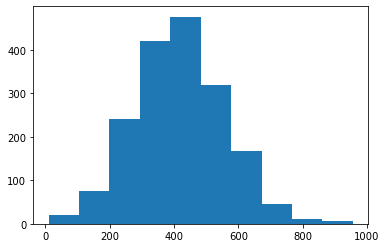

In [132]:
plt.hist(F1_num_tokens )

(array([ 79., 212., 447., 482., 308., 161.,  69.,  25.,  12.,   5.]),
 array([  34. ,  147.9,  261.8,  375.7,  489.6,  603.5,  717.4,  831.3,
         945.2, 1059.1, 1173. ]),
 <BarContainer object of 10 artists>)

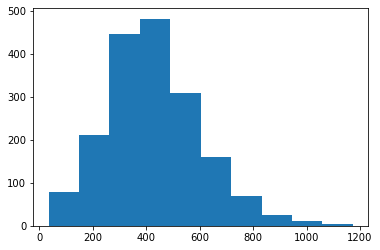

In [133]:
plt.hist(F2_num_tokens )

(array([186., 444., 401., 332., 226.,  93.,  34.,   8.,   1.,   1.]),
 array([ 10. ,  51.4,  92.8, 134.2, 175.6, 217. , 258.4, 299.8, 341.2,
        382.6, 424. ]),
 <BarContainer object of 10 artists>)

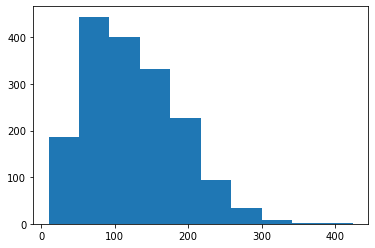

In [134]:
plt.hist(F3_num_tokens )

(array([249., 520., 419., 313., 161.,  71.,  31.,   6.,   1.,   1.]),
 array([  2. ,  43.1,  84.2, 125.3, 166.4, 207.5, 248.6, 289.7, 330.8,
        371.9, 413. ]),
 <BarContainer object of 10 artists>)

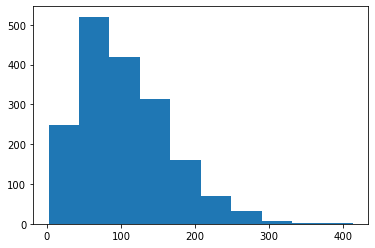

In [135]:
plt.hist(F4_num_tokens )

(array([158., 420., 457., 432., 200.,  95.,  34.,   6.,   1.,   2.]),
 array([  5. ,  53.1, 101.2, 149.3, 197.4, 245.5, 293.6, 341.7, 389.8,
        437.9, 486. ]),
 <BarContainer object of 10 artists>)

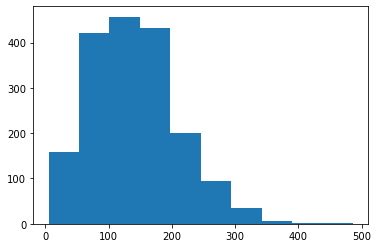

In [136]:
plt.hist(F5_num_tokens )

(array([ 58., 212., 444., 575., 362., 114.,  24.,   9.,   1.,   1.]),
 array([  4. ,  54.5, 105. , 155.5, 206. , 256.5, 307. , 357.5, 408. ,
        458.5, 509. ]),
 <BarContainer object of 10 artists>)

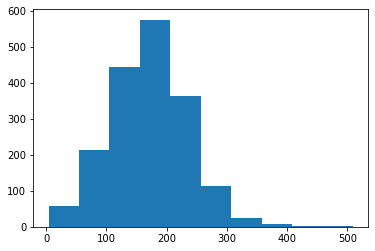

In [137]:
plt.hist(F6_num_tokens )

(array([163., 488., 439., 265., 115.,  65.,  26.,   6.,   0.,   2.]),
 array([  6.,  83., 160., 237., 314., 391., 468., 545., 622., 699., 776.]),
 <BarContainer object of 10 artists>)

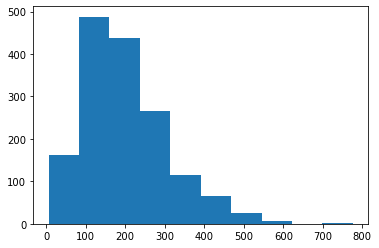

In [138]:
plt.hist(F7_num_tokens )

(array([  7.,  20.,  51.,  72.,  91., 119., 116., 144.,  96.,   7.]),
 array([   4.,  124.,  244.,  364.,  484.,  604.,  724.,  844.,  964.,
        1084., 1204.]),
 <BarContainer object of 10 artists>)

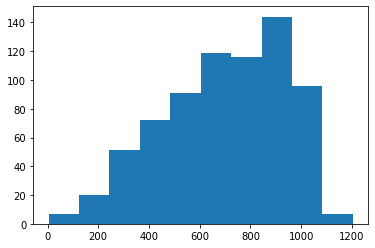

In [139]:
plt.hist(F8_num_tokens )


## embeddings

In [ ]:
# F1
F1_sentence = []

F1_num_tokens = []
for text in F1_essay:
    sente

In [144]:
F1 = pd.read_csv('../Datos/Clean_data/F1.csv')
F1_essay = F1['essay'].values
F1_num_sentences = []
for text in F1_essay:
    num_sentences= len(sent_tokenize(text))
    F1_num_sentences.append(num_sentences)
F1_max_sentences = np.max(F1_num_sentences)
F1_max_sentences

68

In [145]:
sent_tokenize(text)

['Dear - Local Newspaper I agree thats computers are good for society.',
 'Without computers a lot of things couldn’t be done.',
 'Computers are sometimes the easy way out.',
 'And thats why I love them.',
 'Computers almost makes anything possible.',
 'Now say if your an elderly person and you cant get up and your bodys really bad.',
 'Well all you need is a computer.',
 'You can pay your bills online or you can get a job online or even shop online.',
 'All you need is a computer.',
 'Computers are also good if your lazy.',
 'You can just lay in bed all day and go online to work or to the mall and order things all youll have to care about is personal hygenic.',
 'Sometimes computers take a lot of stress of you.',
 'No more ignorant co-workers or no angry boss everythings a-okay.',
 'Computers are also swel because its the eazy way out.',
 'But you have to make sure you get a good computer.',
 'Not and old one because it can breakdown.',
 'Dats one reason why computers arent so good.',